In [18]:
#Import Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset["train"].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [19]:
df_US = df[df['job_country']=='United States'].copy()  # good practice to have a new dataframe


In [20]:
# Now we're going to create a column for month. More about it: docs.python.org/3/library/datetime.html
df_US['job_posted_month'] = df_US['job_posted_date'].dt.strftime('%B')

In [21]:
df_US_pivot = df_US.pivot_table(index='job_posted_month', columns = 'job_title_short', aggfunc = 'size') 
# Mas as datas vem em ordem alfabetica, precisamos mudar para ordem cronologica

In [22]:
# We need to add a column with numerical values to sort months:
df_US_pivot.reset_index(inplace=True)


In [23]:
# Create a column with the month number:
df_US_pivot['month_no'] = pd.to_datetime(df_US_pivot['job_posted_month'], format ='%B').dt.month  # dt.month extrai apenas os meses das datas
df_US_pivot.sort_values('month_no',inplace = True)
df_US_pivot.set_index('job_posted_month', inplace = True)
df_US_pivot.drop(columns = 'month_no',inplace=True)


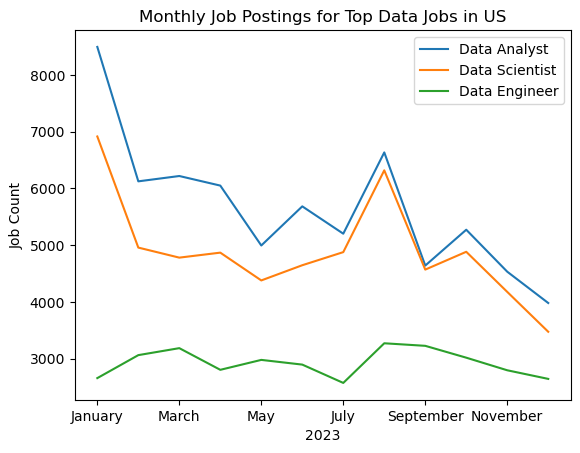

In [30]:
# df_US_pivot.plot(kind='line')  # Grafico esta meio embaralhado
# Vamos apresentar apenas as 3 principais funcoes

top_3 = df_US['job_title_short'].value_counts().head(3)
top_3 = top_3.index.tolist()   # sem tolist, o programa dah outras informacoes 

df_US_pivot[top_3].plot(kind='line')
plt.title('Monthly Job Postings for Top Data Jobs in US')
plt.ylabel('Job Count')
plt.xlabel('2023')
plt.legend()
plt.show()